드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


30개 파일 rms 계산

In [ ]:
import os
import pandas as pd
import numpy as np

def compute_rms(df):
    df['RMS'] = np.sqrt(df['accel_x']**2 + df['accel_y']**2 + df['accel_z']**2)
    return df[['RMS']]  # Only keep RMS column

# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib/'

# 1~30번 데이터 반복 처리
for i in range(1, 31):
    file_path = os.path.join(folder_path, f'vib_measure_{i}.csv')
    df = pd.read_csv(file_path)

    # RMS 계산 및 열 이름 변경
    rms_df = compute_rms(df)

    # 새로운 파일로 저장
    save_path = os.path.join(folder_path, f'vib_measure_{i}_rms.csv')
    rms_df.to_csv(save_path, index=False)

print("✅ 모든 RMS 파일 저장 완료!")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

시간을 기준으로 슬라이싱

In [ ]:
import os
import pandas as pd

# 출력 시간 정보 테이블 (직접 코드로 정의)
time_ranges = {
    1: (4000, 10000),  2: (3500, 6500),  3: (4000, 7500),  4: (3500, 9000),  5: (4000, 10000),
    6: (4000, 8000),   7: (4000, 10000), 8: (4500, 10000), 9: (4500, 10000), 10: (4500, 10000),
    11: (4500, 10000), 12: (4500, 10000),13: (4500, 10000),14: (4500, 10000),15: (4500, 10000),
    16: (4500, 7000), 17: (4500, 8000), 18: (4500, 8000), 19: (4500, 8500), 20: (4500, 7000),
    21: (4000, 8000), 22: (3500, 5300), 23: (3500, 8500), 24: (3500, 10000),25: (4000, 9000),
    26: (4000, 8500), 27: (4000, 7500), 28: (3500, 8000), 29: (4500, 9000), 30: (4000, 9000)
}

# 폴더 경로
folder_path = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms/'

# 슬라이싱 후 저장 루프
for i in range(1, 31):
    # 파일 경로 읽기
    file_path = os.path.join(folder_path, f'vib_measure_{i}_rms.csv')
    df = pd.read_csv(file_path)

    # 시간 필터링 (인덱스 기준: 보통 timestamp는 row 번호로 보면 됨)
    start, end = time_ranges[i]
    sliced_df = df.iloc[start:end].reset_index(drop=True)

    # 저장 경로
    save_path = os.path.join(folder_path, f'vib_measure_{i}_rms_sliced.csv')
    sliced_df.to_csv(save_path, index=False)

print("✅ 출력 시간 기준 RMS 슬라이싱 완료!")

✅ 출력 시간 기준 RMS 슬라이싱 완료!


특정 파일 rms 계산

In [ ]:
import os
import pandas as pd
import numpy as np

def compute_rms(df):
    df['RMS'] = np.sqrt(df['accel_x']**2 + df['accel_y']**2 + df['accel_z']**2)
    return df[['RMS']]

# 폴더 경로
folder_path = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib/'

# 선택한 파일 인덱스
target_indices = [1, 2, 3, 4, 7]

for i in target_indices:
    file_path = os.path.join(folder_path, f'vib_measure_{i}.csv')

    # CSV 불러오기
    df = pd.read_csv(file_path)

    # RMS 계산
    rms_df = compute_rms(df)

    # 새로운 파일로 저장
    save_path = os.path.join(folder_path, f'vib_measure_{i}_rms_sample.csv')
    rms_df.to_csv(save_path, index=False)

print("✅ 모든 RMS 파일 저장 완료!")

1개 파일 rms 시각화

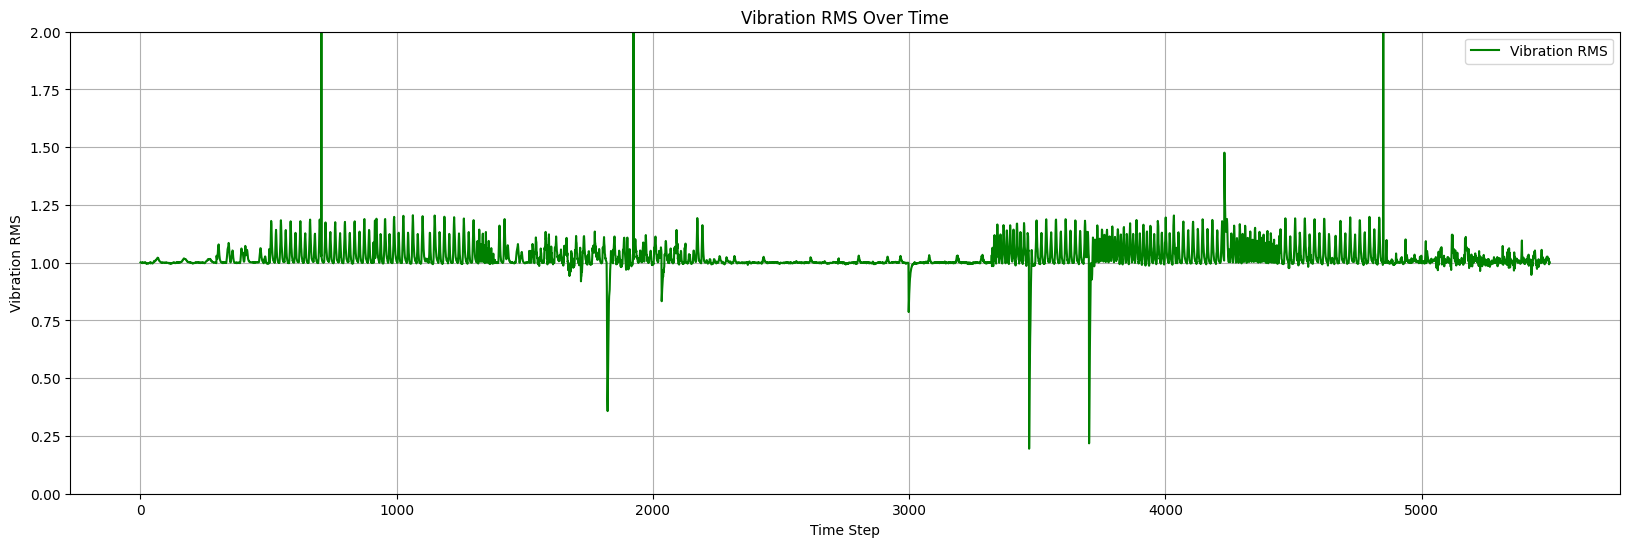

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_sliced/vib_measure_11_rms_sliced.csv", encoding="cp949")

# 시각화 - 필터링된 데이터
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['RMS'], label="Vibration RMS", color='green')
plt.xlabel("Time Step")
plt.ylabel("Vibration RMS")
plt.title("Vibration RMS Over Time")
plt.ylim(0, 2)
plt.grid()
plt.legend()
plt.show()

30개 파일 rms 시각화

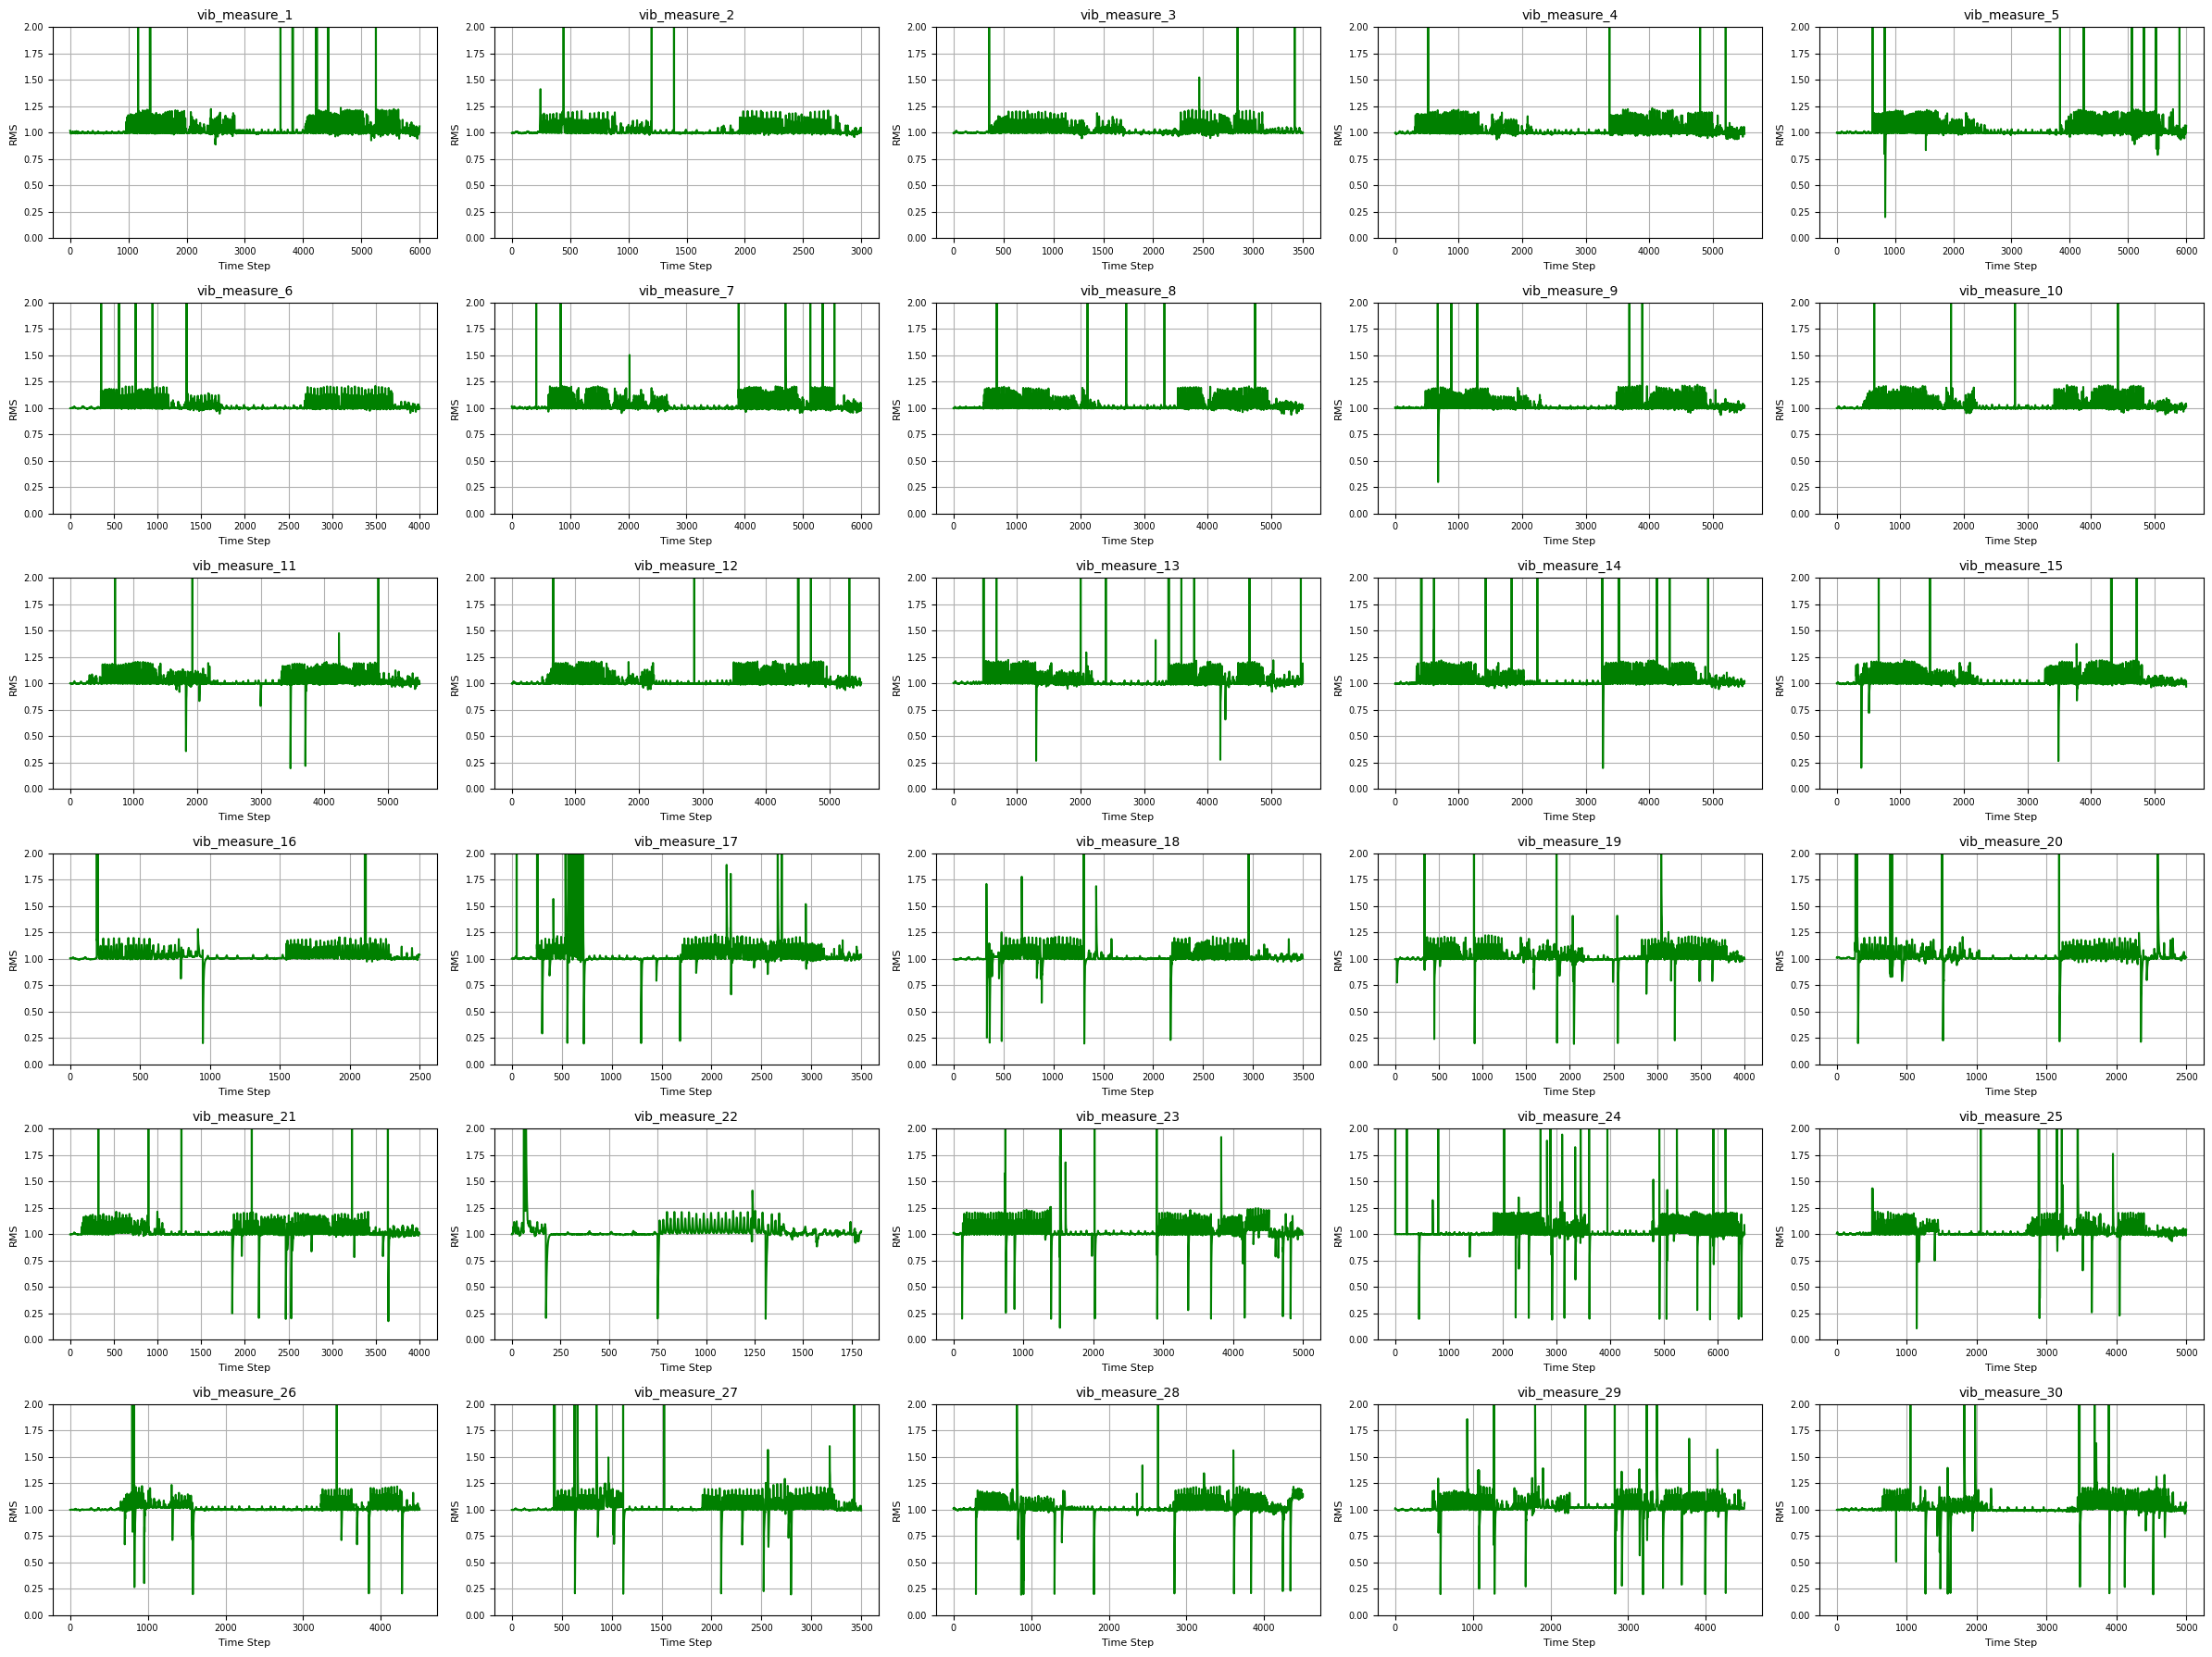

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 슬라이스된 RMS 파일이 있는 폴더
folder_path = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_sliced/'

# 전체 서브플롯 생성 (5열 × 6행)
fig, axes = plt.subplots(6, 5, figsize=(24, 18))  # 크기 조정 가능
axes = axes.flatten()  # 1차원 배열로 변환

for i in range(1, 31):
    file_path = os.path.join(folder_path, f'vib_measure_{i}_rms_sliced.csv')
    df = pd.read_csv(file_path)

    ax = axes[i - 1]
    ax.plot(df.index, df['RMS'], color='green')
    ax.set_title(f'vib_measure_{i}', fontsize=10)
    ax.set_xlabel('Time Step', fontsize=8)
    ax.set_ylabel('RMS', fontsize=8)
    ax.set_ylim(0, 2)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=7)

# 남는 subplot이 있다면 숨김 처리
for j in range(len(axes)):
    if j >= 30:
        axes[j].axis('off')

plt.tight_layout()
plt.show()

특정 파일 rms 시각화

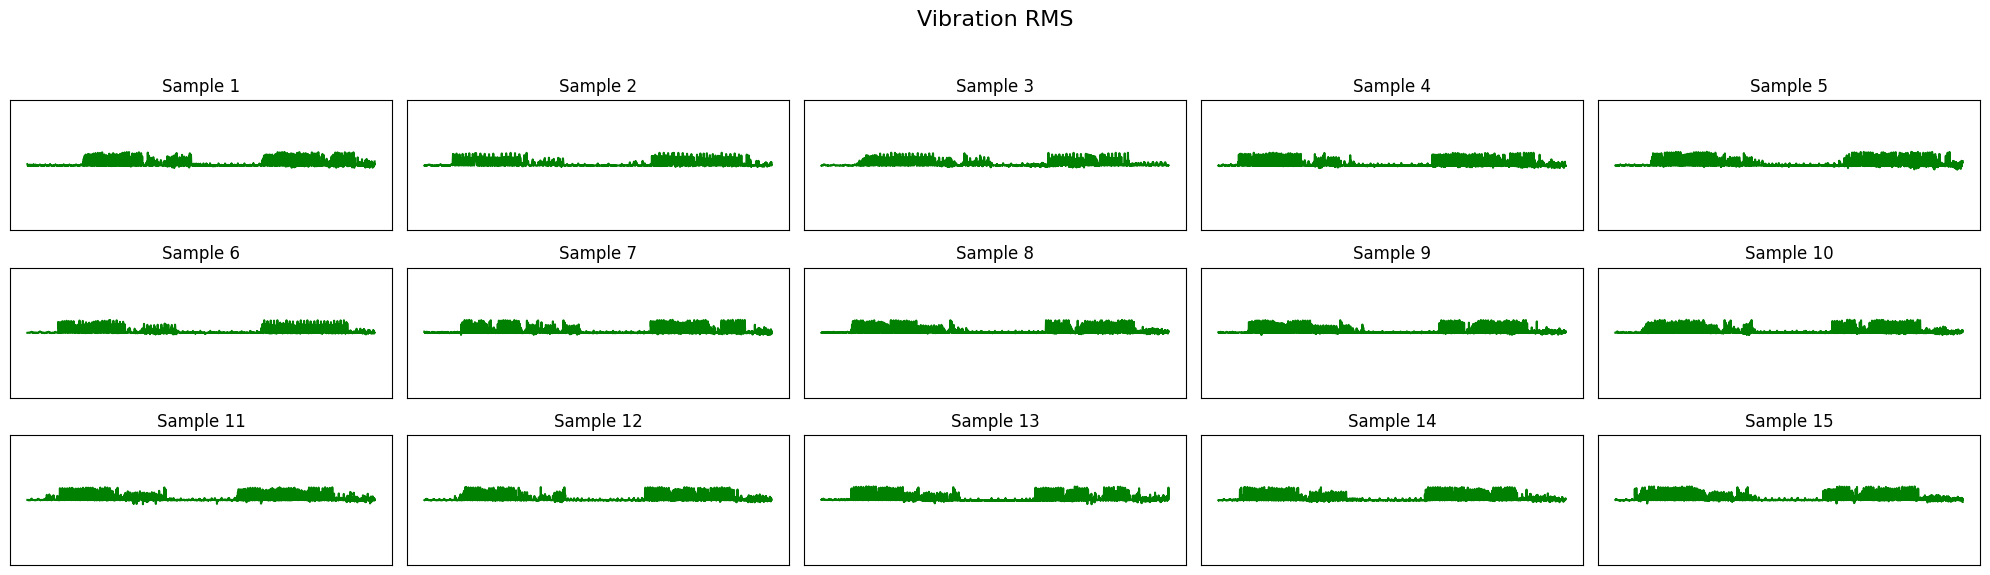

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로
folder_path = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_normal/'

# 보고 싶은 측정 번호 리스트 (15개)
target_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# 서브플롯 설정: 3행 5열
fig, axes = plt.subplots(3, 5, figsize=(20, 6))
axes = axes.flatten()

for idx, i in enumerate(target_indices):
    file_path = os.path.join(folder_path, f'3d_printer_vib_rms_normal_{i}.csv')
    df = pd.read_csv(file_path)

    ax = axes[idx]
    ax.plot(df.index, df['RMS'], color='green')
    ax.set_title(f'Sample {i}')
    ax.set_ylim(0, 2)
    ax.set_xticks([])
    ax.set_yticks([])

# 남는 subplot이 있다면 숨김
for j in range(len(target_indices), len(axes)):
    axes[j].axis('off')

plt.suptitle("Vibration RMS", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

정규분포 검정

Shapiro-Wilk Test: stat=0.0897, p-value=0.0000
❌ 전체 진동 데이터는 정규분포를 따르지 않습니다.


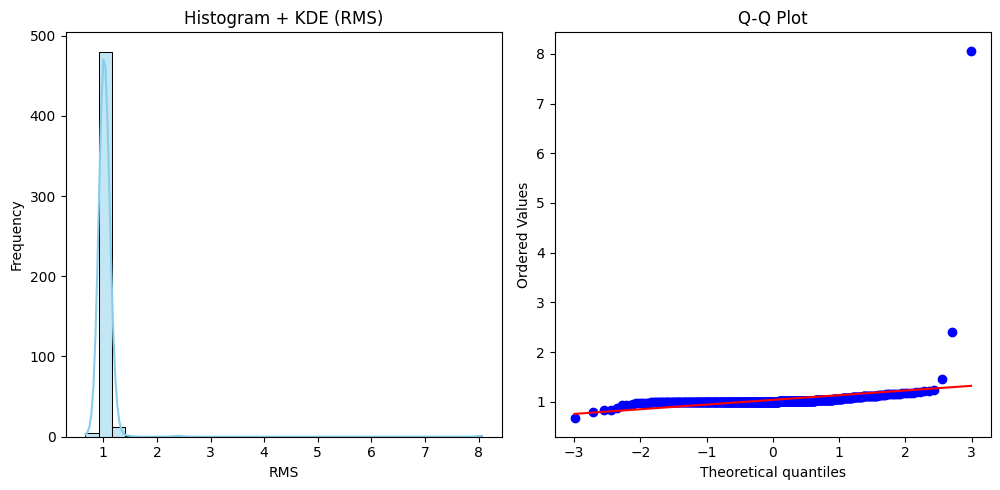

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# 경로 설정
input_folder = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_sliced/'

# 전체 RMS 데이터 수집
all_rms = []

for i in range(1, 31):
    file_path = os.path.join(input_folder, f'vib_measure_{i}_rms_sliced.csv')
    df = pd.read_csv(file_path)
    all_rms.extend(df['RMS'].values)

all_rms = np.array(all_rms)

# (선택) 샘플링
sample_data = all_rms if len(all_rms) < 500 else np.random.choice(all_rms, size=500, replace=False)

# Shapiro-Wilk 검정
stat, p = shapiro(sample_data)
print(f'Shapiro-Wilk Test: stat={stat:.4f}, p-value={p:.4f}')
if p > 0.05:
    print("✅ 전체 진동 데이터는 정규분포를 따른다고 볼 수 있습니다.")
else:
    print("❌ 전체 진동 데이터는 정규분포를 따르지 않습니다.")

# 시각화
plt.figure(figsize=(15, 5))

# 1. 히스토그램 + KDE
plt.subplot(1, 3, 1)
sns.histplot(sample_data, kde=True, bins=30, color='skyblue')
plt.title('Histogram + KDE (RMS)')
plt.xlabel('RMS')
plt.ylabel('Frequency')

# 2. Q-Q Plot
plt.subplot(1, 3, 2)
probplot(sample_data, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# 저장할 폴더 경로 (없으면 사전에 생성 필요)
output_folder = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_normal/'

for i in range(1, 31):
    file_path = os.path.join(input_folder, f'vib_measure_{i}_rms_sliced.csv')
    df = pd.read_csv(file_path)

    # 이상치 탐지
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    df['outlier'] = iso_forest.fit_predict(df[['RMS']])

    # 정상 데이터만 필터링
    df_normal = df[df['outlier'] == 1].reset_index(drop=True)

    # 저장
    save_path = os.path.join(output_folder, f'3d_printer_vib_rms_normal_{i}.csv')
    df_normal[['RMS']].to_csv(save_path, index=False)

print("✅ 이상치 제거 후 데이터 저장 완료!")

✅ 이상치 제거 후 데이터 저장 완료!


In [ ]:
import os
import numpy as np
import pandas as pd

# 입력 및 출력 폴더 경로 설정
input_folder = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_sliced/'
output_folder = '/content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_normal_2/'

# 이상치 기준
upper_threshold = 55
lower_threshold = 0.5

# 파일 처리 루프
for i in range(1, 16):
    file_path = os.path.join(input_folder, f'vib_measure_{i}_rms_sliced.csv')
    df = pd.read_csv(file_path)

    # 조건에 맞는 정상 데이터만 필터링
    df_normal = df[(df['RMS'] <= upper_threshold) & (df['RMS'] >= lower_threshold)].reset_index(drop=True)

    # 저장
    save_path = os.path.join(output_folder, f'3d_printer_vib_rms_normal_2_{i}.csv')
    df_normal[['RMS']].to_csv(save_path, index=False)

print("✅ 임계값 기반 이상치 제거 후 데이터 저장 완료!")

✅ 임계값 기반 이상치 제거 후 데이터 저장 완료!


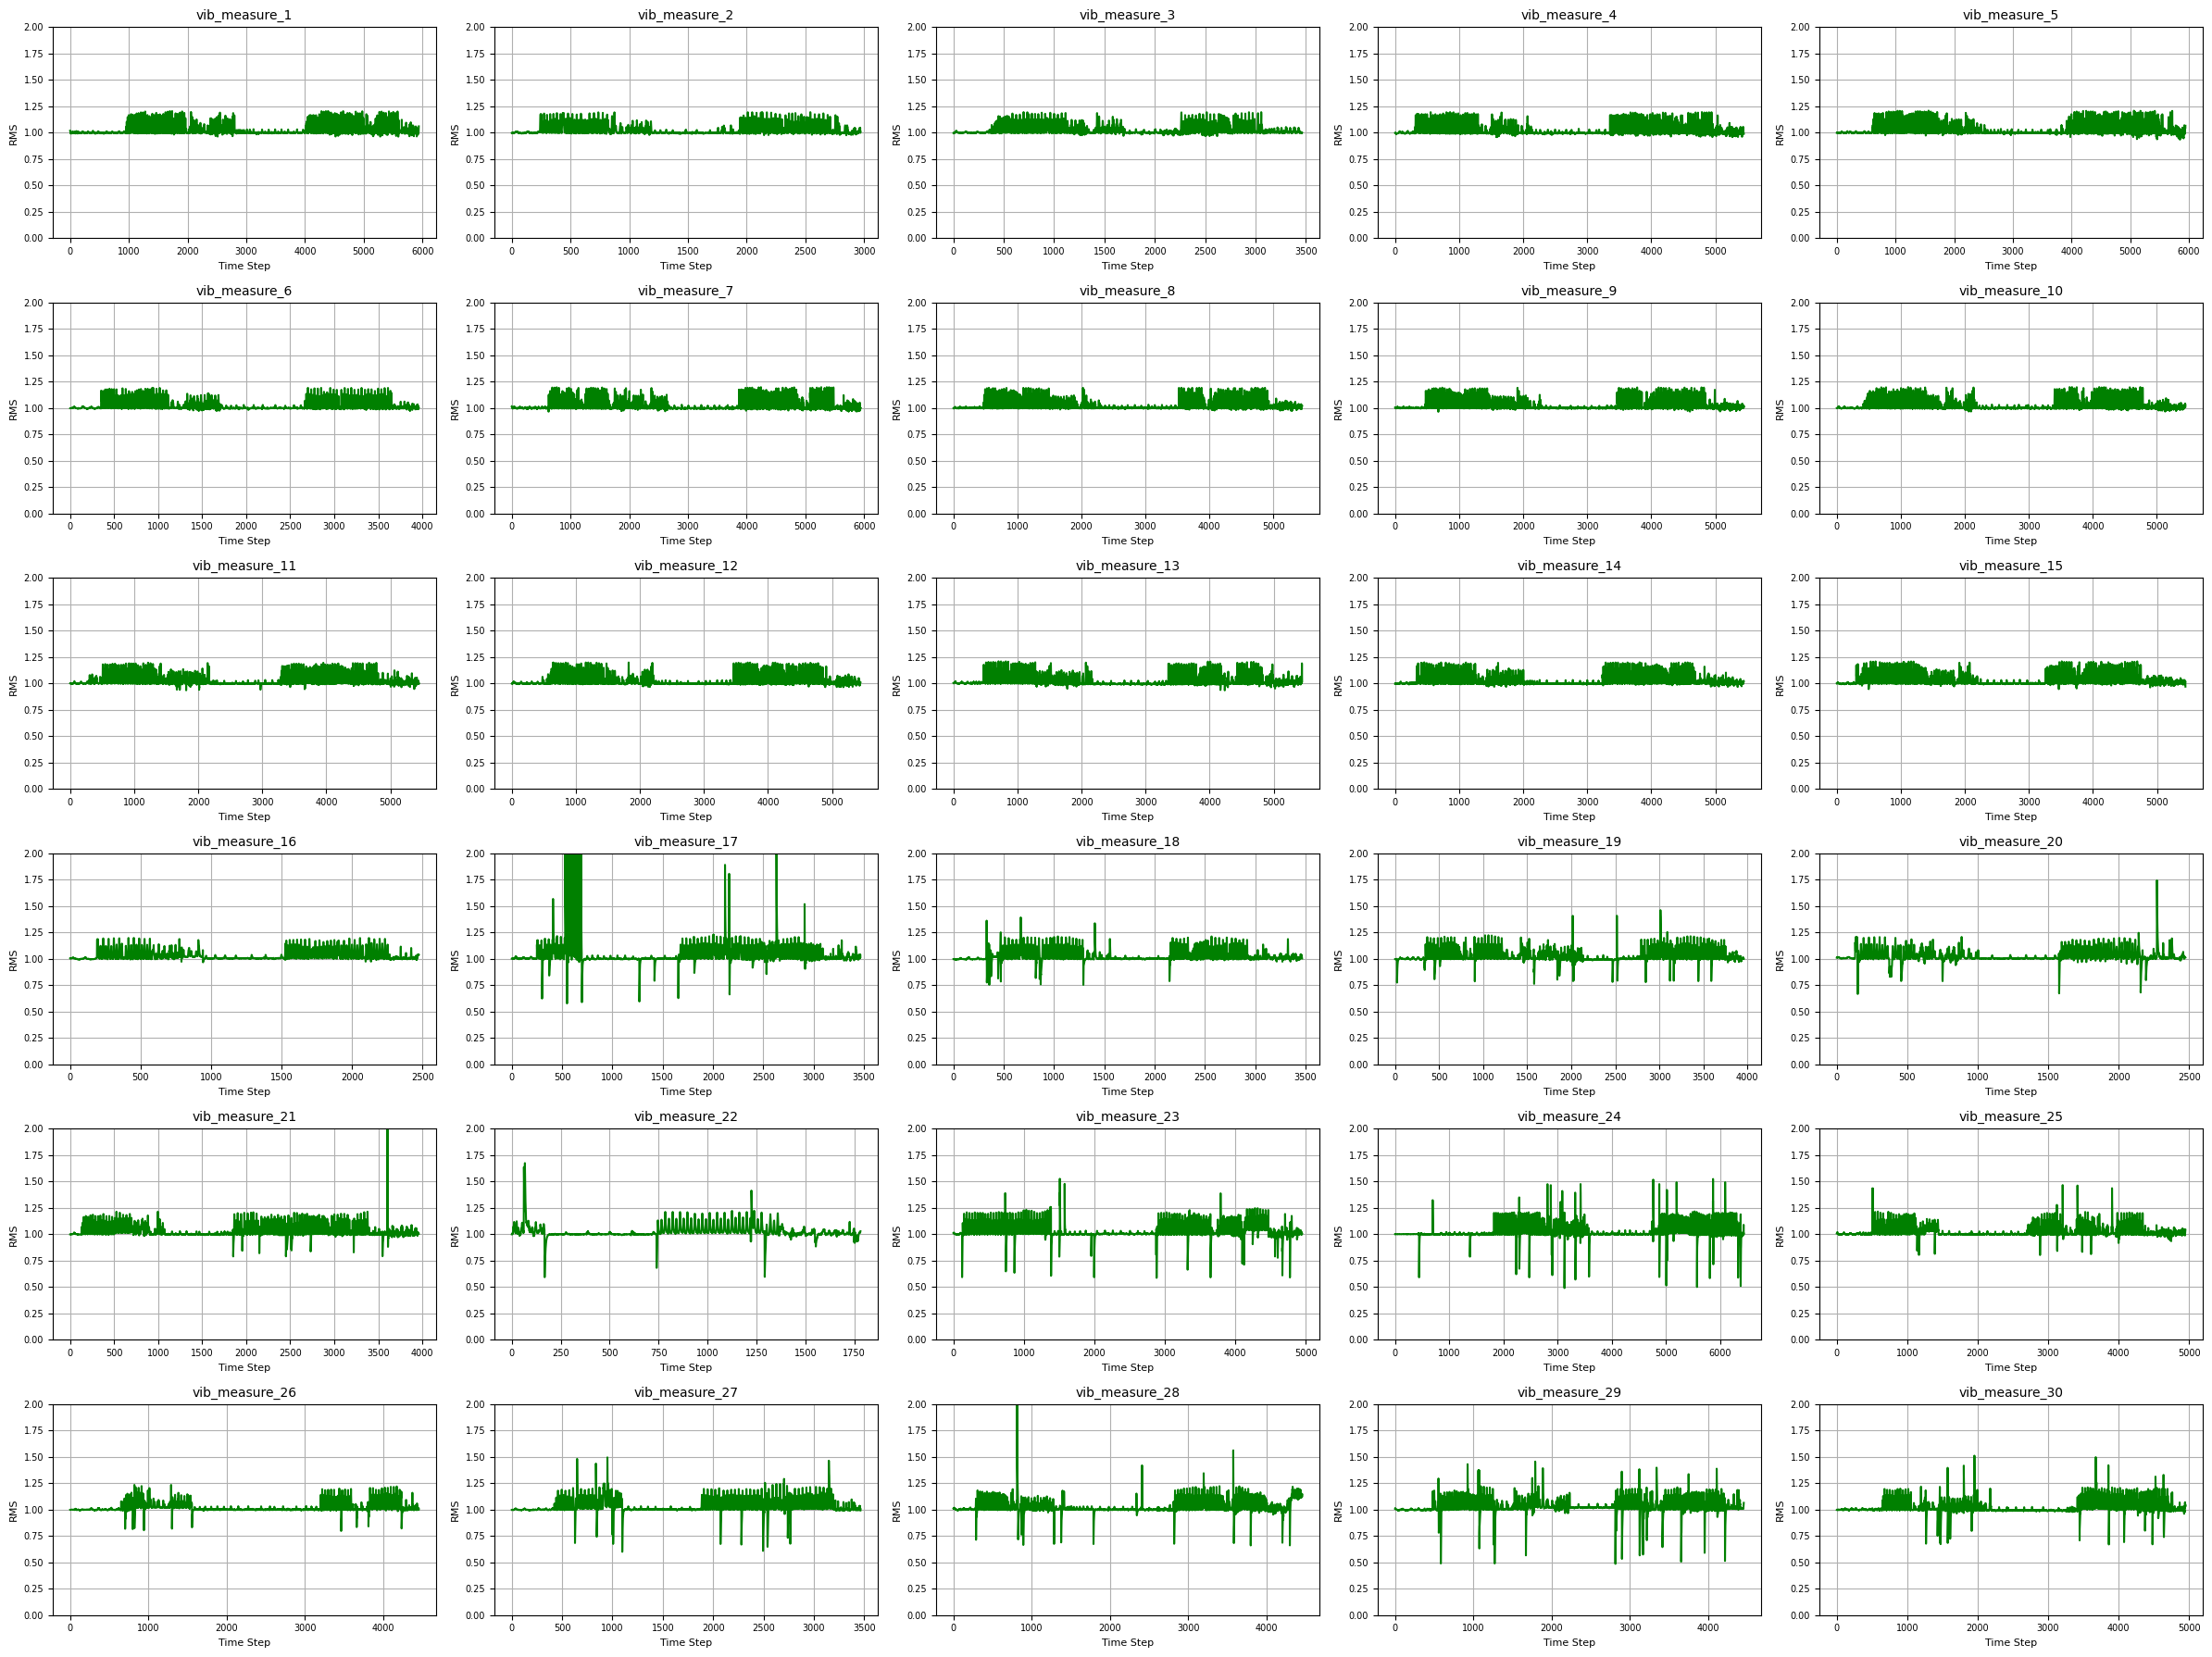

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 슬라이스된 RMS 파일이 있는 폴더
folder_path = 'content/drive/MyDrive/3D_printer_Anomaly_Detection/3d_printer_vib_rms_normal''/

# 전체 서브플롯 생성 (5열 × 6행)
fig, axes = plt.subplots(6, 5, figsize=(24, 18))  # 크기 조정 가능
axes = axes.flatten()  # 1차원 배열로 변환

for i in range(1, 31):
    file_path = os.path.join(folder_path, f'3d_printer_vib_rms_normal_{i}.csv')
    df = pd.read_csv(file_path)

    ax = axes[i - 1]
    ax.plot(df.index, df['RMS'], color='green')
    ax.set_title(f'vib_measure_{i}', fontsize=10)
    ax.set_xlabel('Time Step', fontsize=8)
    ax.set_ylabel('RMS', fontsize=8)
    ax.set_ylim(0, 2)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=7)

# 남는 subplot이 있다면 숨김 처리
for j in range(len(axes)):
    if j >= 30:
        axes[j].axis('off')

plt.tight_layout()
plt.show()